In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
# Define text preprocessing parameters
vocab_size = 10000 # Vocabulary size
embedding_dim = 16 # Dimensionality of embedding vectors
max_length = 100 # Maximum sequence length
trunc_type='post' # Truncation type (post)
padding_type='post' # Padding type (post)
oov_tok = "<OOV>" # Token for unknown words


In [3]:
# Load the dataset
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
# Data preparation
sentences = df['headline'] # Extract headlines
labels = df['is_sarcastic'] # Extract labels
urls = df['article_link'] # Extract URLs

In [5]:
# Split the data into training and testing sets
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.3)

In [6]:
# Tokenization and sequence preprocessing
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
# Build the model
model = tf.keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(), 
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


585/585 - 8s - loss: 0.6813 - accuracy: 0.5605 - val_loss: 0.6608 - val_accuracy: 0.5922 - 8s/epoch - 13ms/step
Epoch 2/30
585/585 - 5s - loss: 0.5088 - accuracy: 0.7796 - val_loss: 0.4041 - val_accuracy: 0.8293 - 5s/epoch - 8ms/step
Epoch 3/30
585/585 - 5s - loss: 0.3361 - accuracy: 0.8619 - val_loss: 0.3545 - val_accuracy: 0.8487 - 5s/epoch - 9ms/step
Epoch 4/30
585/585 - 4s - loss: 0.2772 - accuracy: 0.8895 - val_loss: 0.3392 - val_accuracy: 0.8546 - 4s/epoch - 7ms/step
Epoch 5/30
585/585 - 4s - loss: 0.2386 - accuracy: 0.9065 - val_loss: 0.3334 - val_accuracy: 0.8582 - 4s/epoch - 8ms/step
Epoch 6/30
585/585 - 5s - loss: 0.2110 - accuracy: 0.9188 - val_loss: 0.3361 - val_accuracy: 0.8597 - 5s/epoch - 8ms/step
Epoch 7/30
585/585 - 5s - loss: 0.1867 - accuracy: 0.9285 - val_loss: 0.3461 - val_accuracy: 0.8559 - 5s/epoch - 8ms/step
Epoch 8/30
585/585 - 5s - loss: 0.1677 - accuracy: 0.9368 - val_loss: 0.3587 - val_accuracy: 0.8539 - 5s/epoch - 8ms/step
Epoch 9/30
585/585 - 

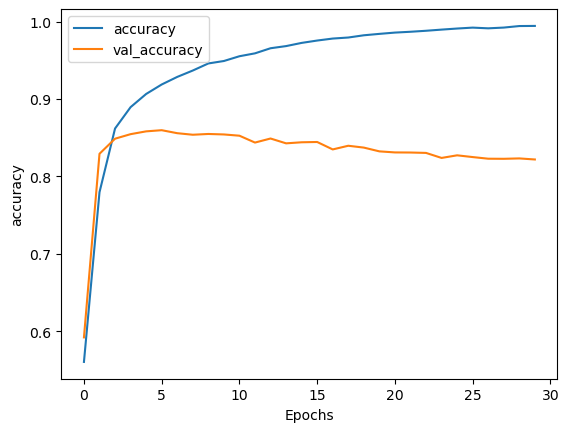

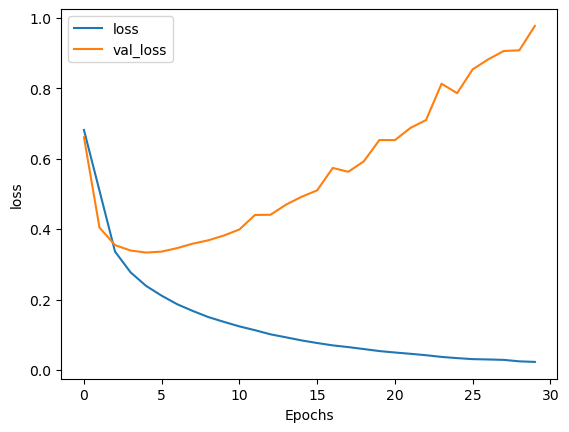

In [10]:
# Visualize training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# Prediction on new data
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 203ms/step
[[0.99800247]
 [0.00146063]]
